In [5]:
import spacy
from textblob import TextBlob

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [6]:
def analyze_polarity(text):
    
    doc = nlp(text)
    
    # Analyze sentiment with TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    return polarity

In [21]:
text = "The battery doesn't last as long as was advertised, if you have the money I would recommend the backlit model."
polarity_score = analyze_polarity(text)

if polarity_score > 0:
    sentiment = 'positive'
elif polarity_score < 0:
    sentiment = 'negative'
else:
    sentiment = 'neutral'

print(f"Text: {text}\nPolarity score: {polarity_score}\nSentiment: {sentiment}")

# -1 to 1

Text: The battery doesn't last as long as was advertised, if you have the money I would recommend the backlit model.
Polarity score: -0.025
Sentiment: negative


In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import defaultdict

In [16]:
sentences = [
    "I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.",
    "This kindle is light and easy to use especially at the beach!!!",
    "Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark",
    "I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages.",
    "Solid entry level Kindle. Great for kids. Gifted for a kid of my friend and they love to use it to read more than their iPads. battery is good but higher model is a bit better.",
    "The battery doesn't last as long as was advertised, if you have the money I would recommend the backlit model.",
    "I bought my Kindle about 2 months ago and the battery is already dead and will not charge"
]

In [17]:
# Initialize dictionaries to hold positive and negative words
positive_words = defaultdict(int)
negative_words = defaultdict(int)

In [18]:
for sentence in sentences:
    words = sentence.split()

    for word in words:
        blob = TextBlob(word)
        polarity = blob.sentiment.polarity

        if polarity > 0:
            positive_words[word.lower()] += 1
        elif polarity < 0:
            negative_words[word.lower()] += 1

In [19]:
pos_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(positive_words)
neg_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(negative_words)

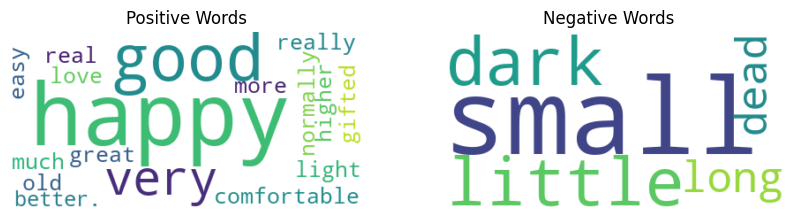

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Words')
ax[1].axis('off')

plt.show()